In [3]:
import tensorflow as tf

hello = tf.constant('Hello Tensorflow!')

print(hello)

tf.Tensor(b'Hello Tensorflow!', shape=(), dtype=string)


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

In [5]:
print("텐서플로 버전: {}".format(tf.__version__))
print("즉시 실행: {}".format(tf.executing_eagerly()))

텐서플로 버전: 2.0.0
즉시 실행: True


In [6]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("데이터셋이 복사된 위치: {}".format(train_dataset_fp))


8192/2194 [================================================================================================================] - 0s 1us/step
데이터셋이 복사된 위치: /Users/hyeyoom/.keras/datasets/iris_training.csv


In [7]:
# CSV 파일안에서 컬럼의 순서
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("특성: {}".format(feature_names))
print("레이블: {}".format(label_name))

특성: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
레이블: species


In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']


In [9]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)


Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [10]:
features, labels = next(iter(train_dataset))

print(features)


OrderedDict([('sepal_length', <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
array([4.9, 6.6, 5. , 7. , 5.1, 5.7, 5. , 7.4, 6.5, 5. , 7.3, 6.1, 6.8,
       7.6, 6.5, 6.3, 5.5, 5. , 5.2, 7.2, 6.3, 5.9, 4.5, 5.8, 5.8, 5.6,
       5.7, 6.9, 5.3, 6.1, 5.4, 5. ], dtype=float32)>), ('sepal_width', <tf.Tensor: id=70, shape=(32,), dtype=float32, numpy=
array([2.5, 2.9, 3.5, 3.2, 3.8, 2.9, 3. , 2.8, 3. , 2. , 2.9, 2.9, 3. ,
       3. , 3.2, 3.3, 3.5, 3.2, 3.4, 3.6, 3.4, 3. , 2.3, 4. , 2.8, 2.5,
       2.8, 3.1, 3.7, 2.8, 3. , 3.6], dtype=float32)>), ('petal_length', <tf.Tensor: id=67, shape=(32,), dtype=float32, numpy=
array([4.5, 4.6, 1.6, 4.7, 1.6, 4.2, 1.6, 6.1, 5.2, 3.5, 6.3, 4.7, 5.5,
       6.6, 5.1, 6. , 1.3, 1.2, 1.4, 6.1, 5.6, 5.1, 1.3, 1.2, 5.1, 3.9,
       4.1, 4.9, 1.5, 4. , 4.5, 1.4], dtype=float32)>), ('petal_width', <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
array([1.7, 1.3, 0.6, 1.4, 0.2, 1.3, 0.2, 1.9, 2. , 1. , 1.8, 1.4, 2.1,
       2.1, 2. , 2.5, 0.2, 0.2, 0

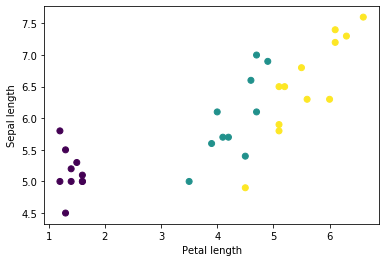

In [11]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [12]:
def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [13]:
train_dataset = train_dataset.map(pack_features_vector)
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[4.6 3.6 1.  0.2]
 [4.4 2.9 1.4 0.2]
 [5.  2.3 3.3 1. ]
 [5.5 2.4 3.7 1. ]
 [6.5 3.  5.2 2. ]], shape=(5, 4), dtype=float32)


In [14]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # 입력의 형태가 필요합니다.
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [15]:
predictions = model(features)
predictions[:5]


<tf.Tensor: id=232, shape=(5, 3), dtype=float32, numpy=
array([[-1.977984  , -0.5367484 ,  0.48869404],
       [-1.7175369 , -0.2644608 ,  0.53120965],
       [-1.8486482 ,  0.01845179,  0.69508845],
       [-2.0130513 ,  0.03250855,  0.7501624 ],
       [-2.59127   ,  0.08478776,  0.9228362 ]], dtype=float32)>

In [16]:
tf.nn.softmax(predictions[:5])


<tf.Tensor: id=237, shape=(5, 3), dtype=float32, numpy=
array([[0.05879188, 0.24844941, 0.6927587 ],
       [0.06778695, 0.2898739 , 0.64233917],
       [0.04951317, 0.32032582, 0.630161  ],
       [0.04067656, 0.3145716 , 0.64475185],
       [0.02036096, 0.29579806, 0.683841  ]], dtype=float32)>

In [17]:
print("  예측: {}".format(tf.argmax(predictions, axis=1)))
print("레이블: {}".format(labels))


  예측: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
레이블: [0 0 1 1 2 2 0 1 0 0 1 2 1 0 2 0 1 1 1 1 1 0 2 2 0 1 2 0 2 0 2 1]


In [18]:
# 카테고리컬 크로스 엔트로피
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [19]:
def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("손실 테스트: {}".format(l))

손실 테스트: 1.5632576942443848


In [20]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

loss_value, grads = grad(model, features, labels)

print("단계: {}, 초기 손실: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("단계: {},      손실: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))

단계: 0, 초기 손실: 1.5632576942443848
단계: 1,      손실: 1.375256061553955


In [22]:
## 노트: 이 셀을 다시 실행하면 동일한 모델의 변수가 사용됩니다.

# 도식화를 위해 결과를 저장합니다.
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # 훈련 루프 - 32개의 배치를 사용합니다.
  for x, y in train_dataset:
    # 모델을 최적화합니다.
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 진행 상황을 추적합니다.
    epoch_loss_avg(loss_value)  # 현재 배치 손실을 추가합니다.
    # 예측된 레이블과 실제 레이블 비교합니다.
    epoch_accuracy(y, model(x))

  # epoch 종료
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("에포크 {:03d}: 손실: {:.3f}, 정확도: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

에포크 000: 손실: 1.203, 정확도: 40.000%
에포크 050: 손실: 0.077, 정확도: 97.500%
에포크 100: 손실: 0.067, 정확도: 98.333%
에포크 150: 손실: 0.094, 정확도: 97.500%
에포크 200: 손실: 0.053, 정확도: 99.167%


/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text

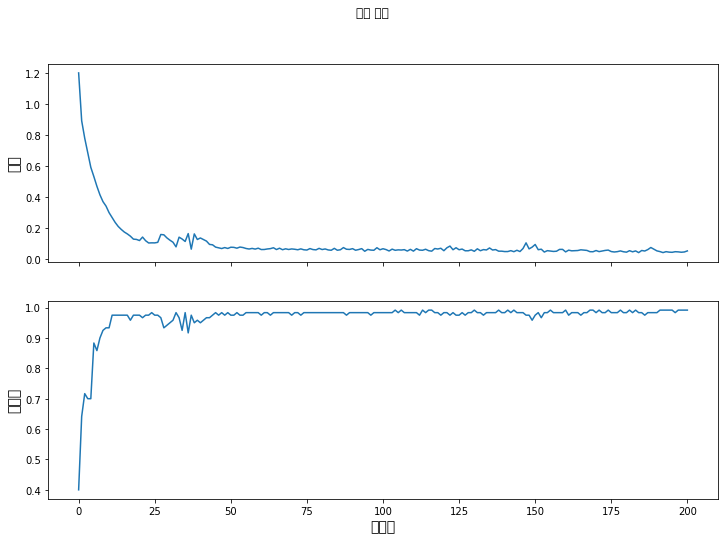

In [23]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('훈련 지표')

axes[0].set_ylabel("손실", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("정확도", fontsize=14)
axes[1].set_xlabel("에포크", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [24]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)


8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [25]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [26]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("테스트 세트 정확도: {:.3%}".format(test_accuracy.result()))

테스트 세트 정확도: 96.667%


In [27]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: id=113052, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [35]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("샘플 {} 예측: {} ({:4.1f}%)".format(i, name, 100*p))

샘플 0 예측: Iris setosa (99.8%)
샘플 1 예측: Iris versicolor (100.0%)
샘플 2 예측: Iris virginica (98.7%)
